[1] 5

[1] 2
[1]  1.761789  1.481142  2.841949  3.624523 -4.751272
[1] -18.23821 -28.51886 -37.15805 -46.37548 -64.75127
[1] -18.23821 -28.51886 -37.15805 -46.37548 -64.75127
  group value predicted
1  trt1   -20 -18.23821
2  trt2   -30 -28.51886
3  trt3   -40 -37.15805
4  trt4   -50 -46.37548
5  trt5   -60 -64.75127
   group   context     value
1   trt1     value -20.00000
2   trt2     value -30.00000
3   trt3     value -40.00000
4   trt4     value -50.00000
5   trt5     value -60.00000
6   trt1 predicted -18.23821
7   trt2 predicted -28.51886
8   trt3 predicted -37.15805
9   trt4 predicted -46.37548
10  trt5 predicted -64.75127
[1] 4
[1] -1.187065 -3.430705 -4.843206  1.191892 -3.324817
[1] -21.18707 -33.43070 -44.84321 -48.80811 -63.32482
[1] -21.18707 -33.43070 -44.84321 -48.80811 -63.32482
  group value predicted
1  trt1   -20 -21.18707
2  trt2   -30 -33.43070
3  trt3   -40 -44.84321
4  trt4   -50 -48.80811
5  trt5   -60 -63.32482
   group   context     value
1   trt1     value -20.00000

geom_point: na.rm = FALSE
stat_identity: na.rm = FALSE
position_identity 

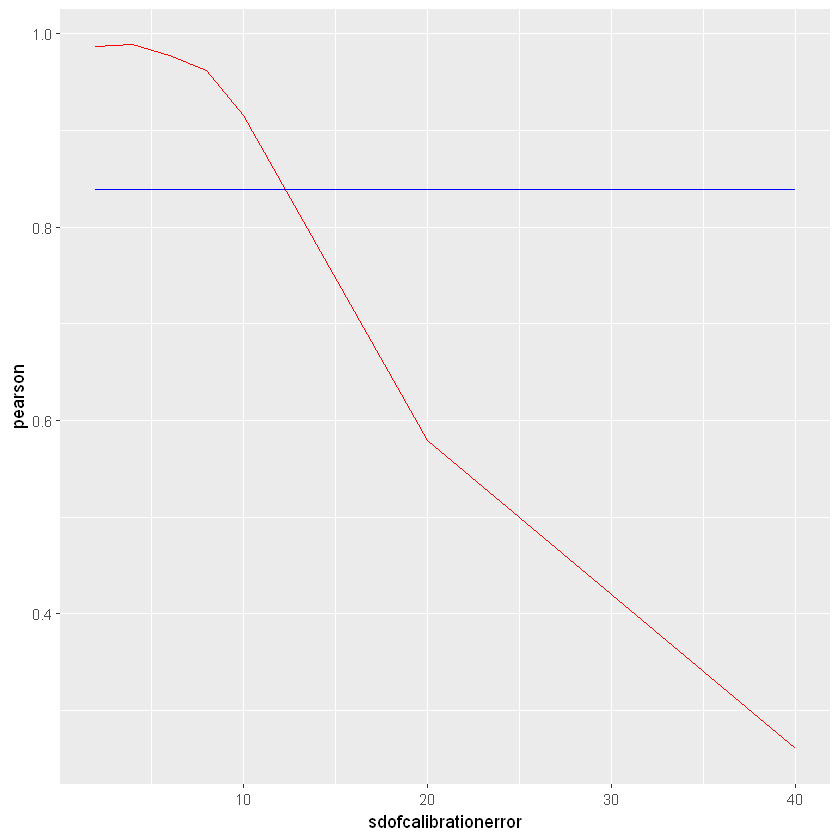

In [1]:
# install.packages("ggplot2")
library(ggplot2)

columns = c("sdofcalibrationerror","pearson","spearman","pearsonrandom95","spearmanrandom95")
length(columns)
result = data.frame(matrix(nrow = 0, ncol = length(columns))) 
colnames(result) = columns
group <- c("trt1", "trt2", "trt3","trt4","trt5")

value <- c(-20,-30,-40,-50,-60)

for (sd in c(2,4,6,8,10,20,40))
{
print(sd)

errormodel <- rnorm(5, 0, sd)
print(errormodel)
print(value+errormodel)
predicted <- value+errormodel
print(predicted)
df1 <- data.frame(group,value,predicted)
print(df1)
library(tidyr)
data_long <- gather(df1, context, value, value,predicted, factor_key=TRUE)
print(data_long)
ggplot(data=data_long, aes(x=group, y=value)) +
  geom_bar(aes(fill=context), stat="identity", 
             position="dodge") 


spear <- cor.test(x=df1$value, y=df1$predicted, method = 'spearman')
pear <- cor.test(x=df1$value, y=df1$predicted, method = 'pearson')
spear <- spear$estimate
pear <- pear$estimate
spearman_random=c()
pearson_random=c()

for (val in 1:1000)
{
testspear=cor.test(x=df1$value, y=sample(df1$predicted), method = 'spearman')
testpear=cor.test(x=df1$value, y=sample(df1$predicted), method = 'pearson')
spearman_random=append(spearman_random,testspear$estimate)
pearson_random=append(pearson_random,testpear$estimate)    
}
quan95spear=quantile(spearman_random,0.95)
quan95person=quantile(pearson_random,0.95)
    
resultline=data.frame(sd,pear,spear,quan95person,quan95spear)
colnames(resultline) = columns
result<-rbind(result,as.data.frame(resultline))    
}    
print(result)

ggplot(data=result, aes(x=sdofcalibrationerror)) +
  geom_line(aes(y=pearson),color="red") +
  geom_line(aes(y=quan95person),color="blue") 
  geom_point()


Warning message:
"package 'BlandAltmanLeh' is in use and will not be installed"


function (x, ...) 
UseMethod("print")
<bytecode: 0x000001bf4a93c420>
<environment: namespace:base>

[1]  6.27720  7.52380  0.41000 -6.73000  3.63000  1.79000 -5.67000 -9.40310
[9] 11.16889


NULL

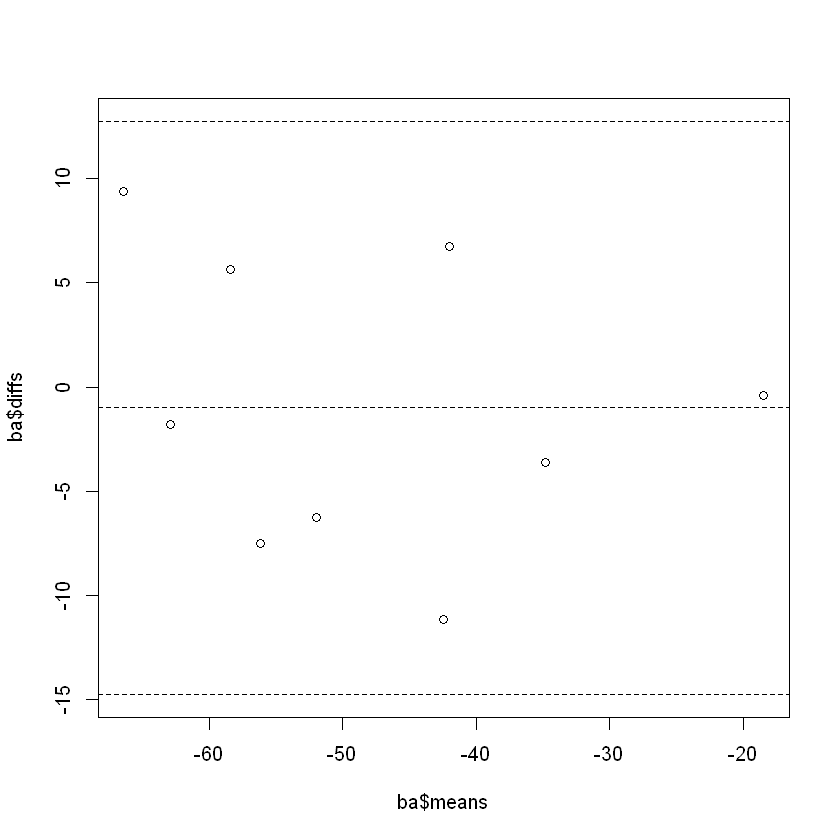

In [5]:
install.packages("BlandAltmanLeh")
name=c("Crouse", "Hougard-1", "Kasoglu2004-1", "Kosoglu2004-2", "LaRosa-1", "Hougaard-1", "Kosoglu2004-3", "Orion2023-1", "Orion2023-2")
model=c(-55.0772,
-59.9238,
-18.65,
-38.66,
-36.63,
-63.79,
-55.53,
-61.6669,
-48.04889
)
data=c(
-48.8,
-52.4,
-18.24,
-45.39,
-33,
-62,
-61.2,
-71.07,
-36.88
)
print
error=data-model
print(error)
#install.packages("BlandAltmanLeh")
library(BlandAltmanLeh)
library(ggplot2)
bland.altman.plot(model, data)

In [8]:
# install.packages("ggplot2")
install.packages("blandr")
install.packages("Metrics")
library(ggplot2)
library(Metrics)


#Define target data vector 
studyarm=c("Crouse", "Hougard-1", "Kasoglu2004-1", "Kosoglu2004-2", "LaRosa-1", "Hougaard-1", "Kosoglu2004-3", "Orion2023-1", "Orion2023-2")
model=as.numeric(c(-55.0772,
-59.9238,
-18.65,
-38.66,
-36.63,
-63.79,
-55.53,
-61.6669,
-48.04889
))

#Define model output vector inputting definition of study arm vector 
value=as.numeric(c(
-48.8,
-52.4,
-18.24,
-45.39,
-33,
-62,
-61.2,
-71.07,
-36.88
))

#Calculate mean between-arm differences. A more conservative alternative would be 
studyarmsstats<-(outer(value,value, `-`))
studyarmsstats2<-mean(abs(studyarmsstats[upper.tri(studyarmsstats)]))
print(paste("Mean abs. between-arm difference:\n", studyarmsstats2))

#Data management for plotting
df0 <- data.frame(studyarm,value,model)
print(df0)
library(tidyr)
data_long0 <- gather(df0, context, value, value,model, factor_key=TRUE)
print(data_long0)

#Bar plot of model vs per arm change of LDLc + LPAc
p1 <- ggplot(data=data_long0, aes(x=studyarm, y=value)) +
  geom_bar(aes(fill=context), stat="identity", 
             position="dodge") +
  geom_text(x=4, y=-70, size=4,  label=(paste("Mean abs. between-arm difference:\n", format(studyarmsstats2,digits=2)))) +
  theme(axis.text.x=element_text(angle = -90, hjust = 0,size = 10 )) 
ggsave(
  "Figure1_barplot.png", 
  p1, 
  device = png, 
  width = 15, height = 12, units = "cm", res = 300
)  
  


# Scatter plot model vs. data with identity and correlation, error metric  
p2 <- ggplot(df0, aes(x=model, y=value)) + geom_point() + geom_abline() + geom_abline(intercept=20) + geom_abline(intercept=-20) +   
  geom_text(x=-40, y=-60, size=6,  label=(paste("Pearson correlation coeff:\n", format(cor.test(x=model, y=value, method = 'pearson')$estimate,digits=3)))) + 
  geom_text(x=-40, y=-70, size=6,  label=(paste("RMSD:\n", format(rmse(model,value),digits=3))))   +
  xlim(-80,-10) +
  ylim(-80,-10) +
  theme(axis.text=element_text(size=20), axis.title=element_text(size=20,face="bold"))

ggsave(
  "Figure2_scatterplot.png", 
  p2, 
  device = png, 
  width = 18, height = 14, units = "cm", res = 300
)            
            
library(blandr)
# Blandr Bland - Altman analysis of the calibration vs. data points 
p3 <- blandr.draw(model,value ) + 
 labs(title="Bland-Altman analysis of\nmodel calibration vs. data", x ="Means ", y = "Differences")+
 blandr.output.text(model,value,sig.level=0.95)

ggsave(
  "Figure3_BlandAltman1.png", 
  p3, 
  device = png, 
  width = 13, height = 11, units = "cm", res = 300
)


Installing package into 'C:/Users/AlexanderKulesza/AppData/Local/R/win-library/4.4'
(as 'lib' is unspecified)



also installing the dependency 'jmvcore'




package 'jmvcore' successfully unpacked and MD5 sums checked
package 'blandr' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\AlexanderKulesza\AppData\Local\Temp\RtmpCArlzI\downloaded_packages


Warning message:
"package 'Metrics' is in use and will not be installed"


[1] "Mean abs. between-arm difference:\n 19.665"
       studyarm  value     model
1        Crouse -48.80 -55.07720
2     Hougard-1 -52.40 -59.92380
3 Kasoglu2004-1 -18.24 -18.65000
4 Kosoglu2004-2 -45.39 -38.66000
5      LaRosa-1 -33.00 -36.63000
6    Hougaard-1 -62.00 -63.79000
7 Kosoglu2004-3 -61.20 -55.53000
8   Orion2023-1 -71.07 -61.66690
9   Orion2023-2 -36.88 -48.04889
        studyarm context     value
1         Crouse   value -48.80000
2      Hougard-1   value -52.40000
3  Kasoglu2004-1   value -18.24000
4  Kosoglu2004-2   value -45.39000
5       LaRosa-1   value -33.00000
6     Hougaard-1   value -62.00000
7  Kosoglu2004-3   value -61.20000
8    Orion2023-1   value -71.07000
9    Orion2023-2   value -36.88000
10        Crouse   model -55.07720
11     Hougard-1   model -59.92380
12 Kasoglu2004-1   model -18.65000
13 Kosoglu2004-2   model -38.66000
14      LaRosa-1   model -36.63000
15    Hougaard-1   model -63.79000
16 Kosoglu2004-3   model -55.53000
17   Orion2023-1   model -

Warning message:
"package 'blandr' was built under R version 4.4.1"
Warning message in blandr.output.text(model, value, sig.level = 0.95):
"'blandr.output.text' is deprecated.
Use 'blandr.output.text' instead.
See help("Deprecated")"


Number of comparisons:  9 
Maximum value for average measures:  -18.445 
Minimum value for average measures:  -66.36845 
Maximum value for difference in measures:  9.4031 
Minimum value for difference in measures:  -11.16889 

Bias:  -0.9996433 
Standard deviation of bias:  7.019353 

Standard error of bias:  2.339784 
Standard error for limits of agreement:  4.159832 

Bias:  -0.9996433 
Bias- upper 95% CI:  4.395909 
Bias- lower 95% CI:  -6.395196 

Upper limit of agreement:  12.75829 
Upper LOA- upper 95% CI:  22.35088 
Upper LOA- lower 95% CI:  3.1657 

Lower limit of agreement:  -14.75757 
Lower LOA- upper 95% CI:  -5.164986 
Lower LOA- lower 95% CI:  -24.35016 

Derived measures:  
Mean of differences/means:  3.042503 
Point estimate of bias as proportion of lowest average:  1.506203 
Point estimate of bias as proportion of highest average 5.41959 
Spread of data between lower and upper LoAs:  27.51586 
Bias as proportion of LoA spread:  -3.632971 

Bias: 
 -0.9996433  ( -6.39519

Warning message:
"Use of `plot.data$x.axis` is discouraged.
ℹ Use `x.axis` instead."
Warning message:
"Use of `plot.data$y.axis` is discouraged.
ℹ Use `y.axis` instead."


In [10]:
columns = c("SDcalibrationerror","pearson","spearman","pearsonrandom95","spearmanrandom95")
length(columns)
result = data.frame(matrix(nrow = 0, ncol = length(columns))) 
colnames(result) = columns

for (sd in c(2,4,8,16,32,64)) # assume model error being distributed with these SDs
{
print(sd)

errormodel <- rnorm(length(value), 0, sd)
print(errormodel)
print(value+errormodel)
predicted <- value+errormodel # construct dummy simulation data 
print(predicted)
df1 <- data.frame(studyarm,value,predicted)
print(df1)
library(tidyr)
data_long <- gather(df1, context, value, value,predicted, factor_key=TRUE)
print(data_long)
    
# calculate simulated - data correlation coefficients 
spear <- cor.test(x=df1$value, y=df1$predicted, method = 'spearman')
pear <- cor.test(x=df1$value, y=df1$predicted, method = 'pearson')
spear <- spear$estimate
pear <- pear$estimate
spearman_random=c()
pearson_random=c()

for (val in 1:1000) # do random model (data permutation) sampling
 {
#print(val)
# gather random model correlation cowefficients with data      
testspear=cor.test(x=df1$value, y=sample(df1$predicted), method = 'spearman')
testpear=cor.test(x=df1$value, y=sample(df1$predicted), method = 'pearson')
spearman_random=append(spearman_random,testspear$estimate)
pearson_random=append(pearson_random,testpear$estimate)    
}
quan95spear=quantile(spearman_random,0.95)
quan95person=quantile(pearson_random,0.95)
    
resultline=data.frame(sd,pear,spear,quan95person,quan95spear)
colnames(resultline) = columns
result<-rbind(result,as.data.frame(resultline))    
}    
#print(result)
# plot random model 95 percentile,  real model (single value) and continous random error model for different SDs  
mypearson=cor.test(x=model, y=value, method = 'pearson')
print(mypearson)
p7<-ggplot(data=result, aes(x=SDcalibrationerror)) +
  geom_line(aes(y=pearson),color="red") +
  geom_line(aes(y=quan95person),color="blue") +
  geom_text(x=20, y=0.7, size=3,  , col="blue", label=(paste("Randompermutation-versus-data\n95 percentile of Pearson correlation coeffs:\n", format(quan95person[1],digits=3)))) +
  geom_hline(yintercept=mypearson$estimate) + 
  geom_text(x=20, y=0.8, size=3,  , col="black", label=(paste("Model-versus-data\nPearson correlation coeff:\n", format(mypearson$estimate,digits=3)))) +
  geom_text(x=20, y=0.9, size=3,  , col="red", label="Data + random error with SD=x\n versus data Pearson correlation coeff")

ggsave(
  "Figure_Pearson.png", 
  p7, 
  device = png, 
  width = 13, height = 11, units = "cm", res = 300
)

  

[1] 5

[1] 2
[1]  1.40830675 -0.51958080  1.43928563  2.34767299 -1.72832130 -0.06974749
[7] -2.70750096  0.26992037 -0.45586998
[1] -47.39169 -52.91958 -16.80071 -43.04233 -34.72832 -62.06975 -63.90750
[8] -70.80008 -37.33587
[1] -47.39169 -52.91958 -16.80071 -43.04233 -34.72832 -62.06975 -63.90750
[8] -70.80008 -37.33587
       studyarm  value predicted
1        Crouse -48.80 -47.39169
2     Hougard-1 -52.40 -52.91958
3 Kasoglu2004-1 -18.24 -16.80071
4 Kosoglu2004-2 -45.39 -43.04233
5      LaRosa-1 -33.00 -34.72832
6    Hougaard-1 -62.00 -62.06975
7 Kosoglu2004-3 -61.20 -63.90750
8   Orion2023-1 -71.07 -70.80008
9   Orion2023-2 -36.88 -37.33587
        studyarm   context     value
1         Crouse     value -48.80000
2      Hougard-1     value -52.40000
3  Kasoglu2004-1     value -18.24000
4  Kosoglu2004-2     value -45.39000
5       LaRosa-1     value -33.00000
6     Hougaard-1     value -62.00000
7  Kosoglu2004-3     value -61.20000
8    Orion2023-1     value -71.07000
9    Orion2023-2   

: 